In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
data = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
def replace_out_of_range(data, column, min_val, max_val):
    data[column] = data[column].apply(lambda x: x if min_val <= x <= max_val else None)
    return data

data = replace_out_of_range(data, 'restingBP', 94, 200)
data = replace_out_of_range(data, 'serumcholestrol', 126, 564)
data = replace_out_of_range(data, 'maxheartrate', 71, 202)
data = replace_out_of_range(data, 'oldpeak', 0, 6.2)

In [ ]:
data['restingBP'].fillna(data['restingBP'].median(), inplace=True)
data['serumcholestrol'].fillna(data['serumcholestrol'].median(), inplace=True)
data['maxheartrate'].fillna(data['maxheartrate'].median(), inplace=True)
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

/tmp/ipython-input-4-3061989274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['restingBP'].fillna(data['restingBP'].median(), inplace=True)
/tmp/ipython-input-4-3061989274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
print(data.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [ ]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,327.0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,327.0,0,2,136,0,5.3,3,2,1


In [ ]:
data_cleaned = data.drop(columns=['patientid'])

In [ ]:
scaler = StandardScaler()
continuous_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
data_cleaned[continuous_cols] = scaler.fit_transform(data_cleaned[continuous_cols])

In [ ]:
data_encoded = pd.get_dummies(data_cleaned, columns=['chestpain', 'restingrelectro', 'slope'], drop_first=True)

data_encoded.head()

,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,noofmajorvessels,target,chestpain_1,chestpain_2,chestpain_3,restingrelectro_1,restingrelectro_2,slope_1,slope_2,slope_3
0,0.210464,1,0.642833,-0.019670,0,0.044567,0,1.507245,3,1,False,True,False,True,False,False,False,True
1,-0.517591,1,-1.928098,-0.941106,0,-0.891840,0,0.576955,1,0,False,False,False,True,False,True,False,False
2,-0.013553,1,-0.625938,-1.759116,0,1.654017,1,1.332816,0,0,False,True,False,False,False,True,False,False
3,-0.349578,1,-0.458995,-0.320547,1,0.220143,0,0.286239,2,1,False,False,False,True,False,False,True,False
4,-1.021629,1,1.577717,-0.019670,0,-0.277323,0,1.507245,2,1,True,False,False,False,True,False,False,True


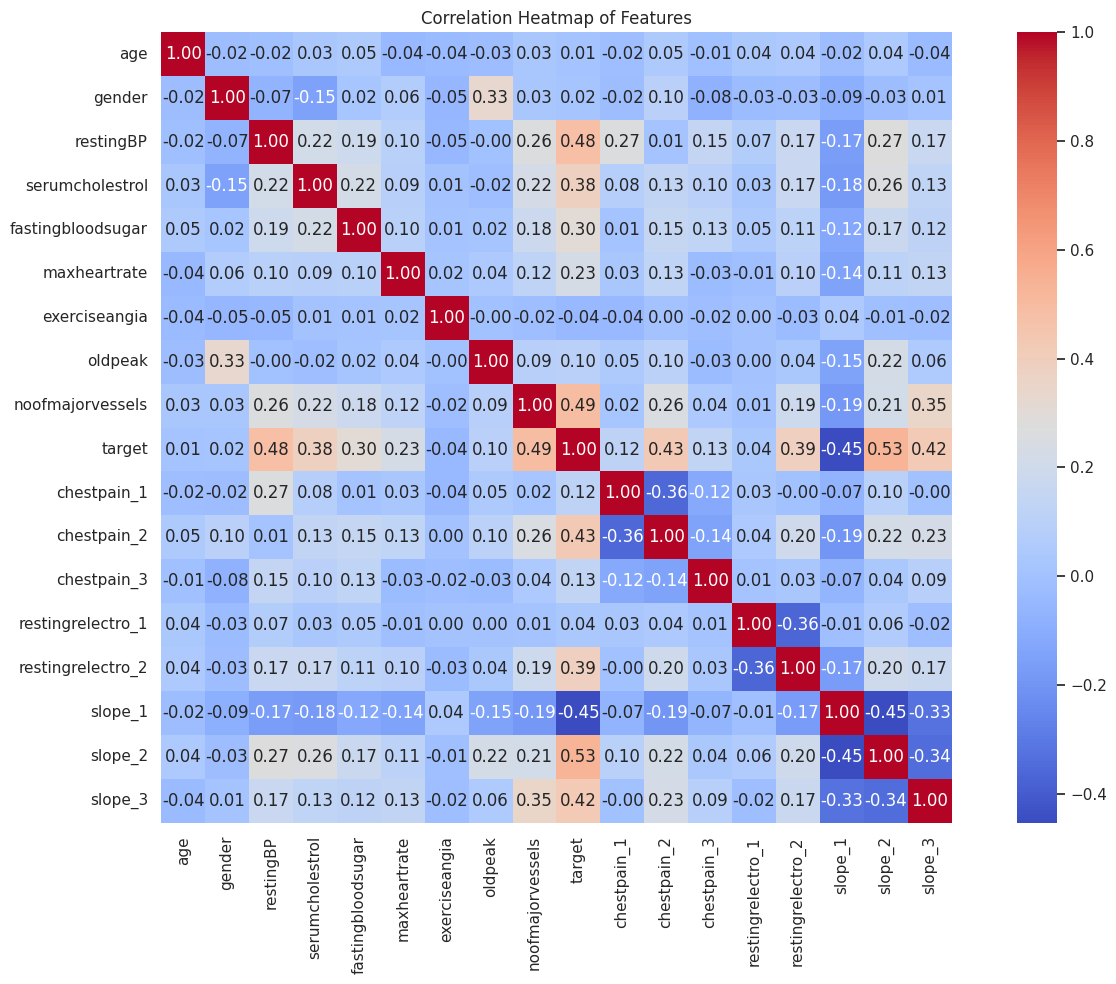

In [ ]:
#Correlation Heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

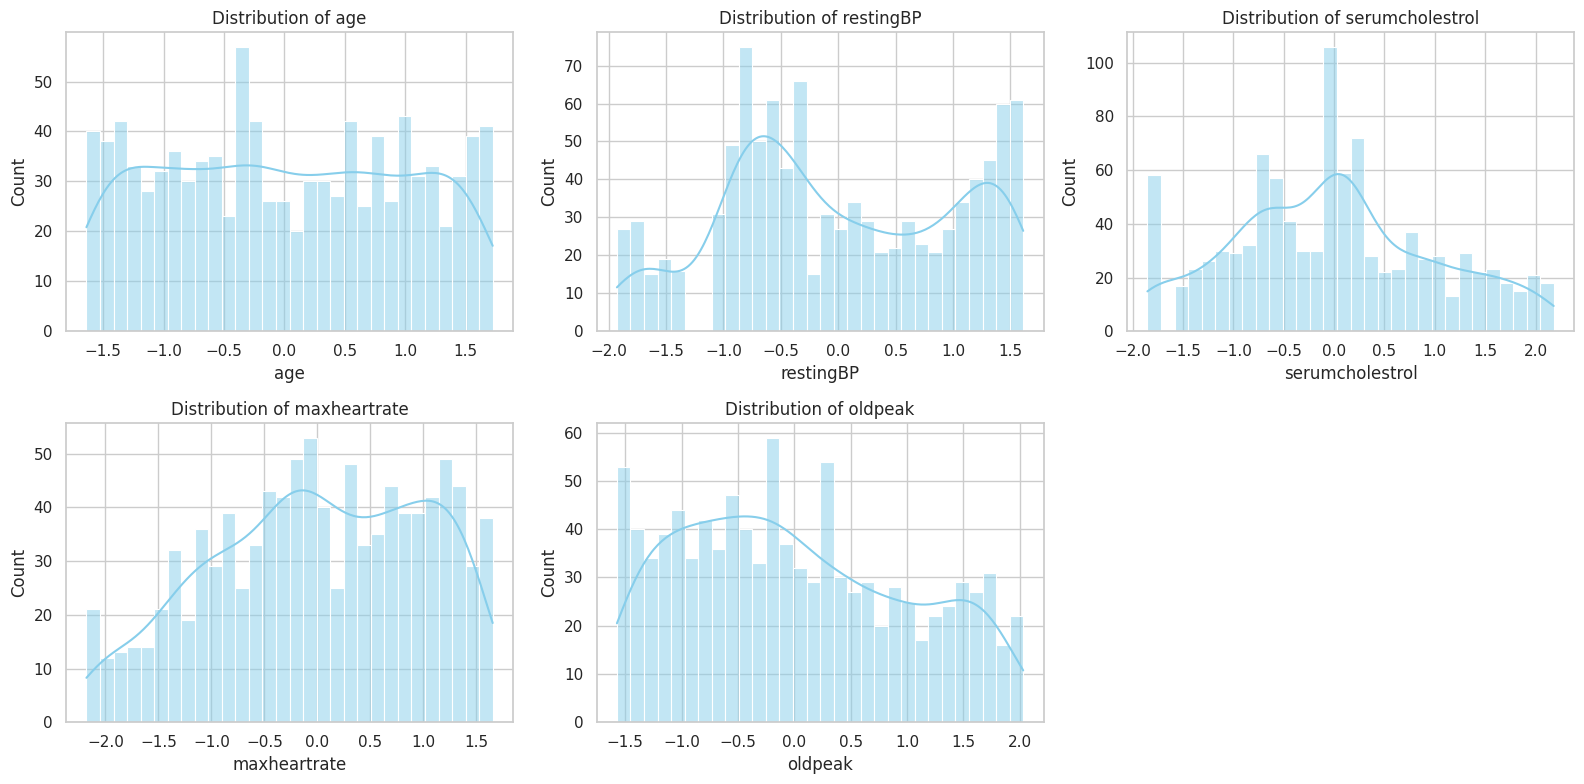

In [ ]:
#Distribution plots
numerical_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
for i, col in enumerate(numerical_cols):
    sns.histplot(data_encoded[col], kde=True, ax=axes[i//3, i%3], bins=30, color='skyblue')
    axes[i//3, i%3].set_title(f"Distribution of {col}")
axes[-1, -1].axis('off')  # Hide the empty subplot
plt.tight_layout()
plt.show()

In [ ]:
correlation_with_target = data_encoded.corr()['target'].drop('target')  # Exclude self-correlation

important_features = correlation_with_target.abs().sort_values(ascending=False)

print("Most important attributes based on correlation with target:")
print(important_features)

Most important attributes based on correlation with target:
slope_2              0.534405
noofmajorvessels     0.489866
restingBP            0.482387
slope_1              0.453264
chestpain_2          0.428739
slope_3              0.424151
restingrelectro_2    0.387768
serumcholestrol      0.384313
fastingbloodsugar    0.303233
maxheartrate         0.228343
chestpain_3          0.133167
chestpain_1          0.117021
oldpeak              0.098053
exerciseangia        0.039874
restingrelectro_1    0.036168
gender               0.015769
age                  0.008356
Name: target, dtype: float64


In [ ]:
top_features = [
    'slope_2', 'noofmajorvessels', 'slope_3', 'chestpain_2', 'slope_1',
    'restingBP', 'restingrelectro_2', 'serumcholestrol', 'fastingbloodsugar', 'gender'
]

X = data_encoded[top_features]
y = data_encoded['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predLR = modelLR.predict(X_test_scaled)

In [ ]:
print("\nAccuracy Score:", accuracy_score(y_test, y_predLR))


Accuracy Score: 0.955


In [ ]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_predDT = modelDT.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("\nAccuracy of Decision Tree: ",accuracy_score(y_test, y_predDT))


Accuracy of Decision Tree:  0.925


In [ ]:
modelRF = RandomForestClassifier(random_state=42)
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_predRF = modelRF.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predRF))

Accuracy: 0.97


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(modelRF, X, y, cv=5)  # 5-fold
print("Cross-Validation Accuracy: ", cv_scores.mean())

Cross-Validation Accuracy:  0.969


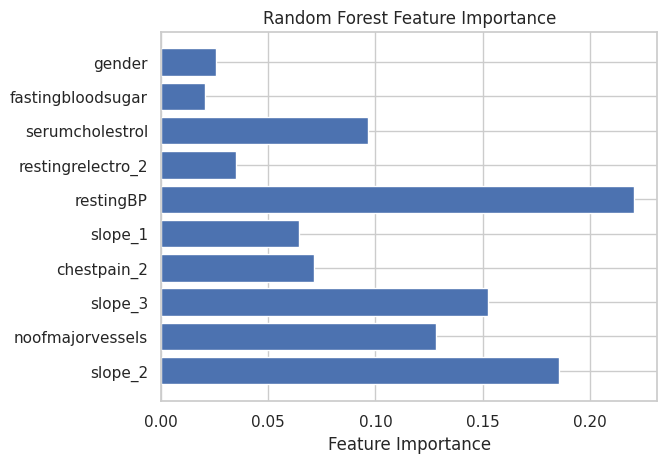

In [ ]:
importances = modelRF.feature_importances_
plt.barh(top_features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
modelLR2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)  # L2 regularization
modelLR2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
y_predLR2 = modelLR.predict(X_test_scaled)

In [ ]:
print("Accuracy for Logistic Regression after L2 regularization: ",accuracy_score(y_test, y_predLR2))

Accuracy for Logistic Regression after L2 regularization:  0.955


In [ ]:
modelDT2 = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
modelDT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

In [ ]:
y_predDT2 = modelDT.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("\nAccuracy of Decision Tree after pruning: ",accuracy_score(y_test, y_predDT2))


Accuracy of Decision Tree after pruning:  0.925


In [ ]:
modelRF2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',  # or 'log2'
    random_state=42
)
modelRF2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [ ]:
y_predRF2 = modelRF.predict(X_test)

In [ ]:
print("Accuracy of Random Forest by setting:", accuracy_score(y_test, y_predRF2))

Accuracy of Random Forest by setting: 0.97


In [ ]:
y_proba = modelRF2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9940273916177531


In [ ]:
new_data = {
    'slope_2': 0,
    'noofmajorvessels': 1,
    'slope_3': 1,
    'chestpain_2': 0,
    'slope_1': 0,
    'restingBP': 130,
    'restingrelectro_2': 0,
    'serumcholestrol': 250,
    'fastingbloodsugar': 0,
    'gender': 1
}

new_df = pd.DataFrame([new_data])
new_scaled = scaler.transform(new_df)

In [ ]:
probabilityLR2 = modelLR2.predict_proba(new_scaled)[0][1]
predictionLR2 = modelLR2.predict(new_scaled)[0]

print(f"Probability of heart disease: {probabilityLR2:.4f}")
print("Prediction:", "Has Heart Disease" if predictionLR2 == 1 else "No Heart Disease")

Probability of heart disease: 1.0000
Prediction: Has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
probabilityDT2 = modelDT2.predict_proba(new_scaled)[0][1]
predictionDT2 = modelDT2.predict(new_scaled)[0]

print(f"Probability of heart disease: {probabilityDT2:.4f}")
print("Prediction:", "Has Heart Disease" if predictionDT2 == 1 else "No Heart Disease")

Probability of heart disease: 1.0000
Prediction: Has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
probabilityRF2 = modelRF2.predict_proba(new_scaled)[0][1]
predictionRF2 = modelRF2.predict(new_scaled)[0]

print(f"Probability of heart disease: {probabilityRF2:.4f}")
print("Prediction:", "Has Heart Disease" if predictionRF2 == 1 else "No Heart Disease")

Probability of heart disease: 0.6690
Prediction: Has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                             cv=5, n_jobs=-1,
                                                             train_sizes=np.linspace(.1, 1.0, 5),
                                                             scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")
    plt.legend(loc="best")
    plt.show()

In [ ]:
print("Accuracy for training LR2: ", modelLR2.score(X_train_scaled, y_train))
print("Accuracy for testing LR2: ", modelLR2.score(X_test_scaled, y_test))

Accuracy for training LR2:  0.855
Accuracy for testing LR2:  0.875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


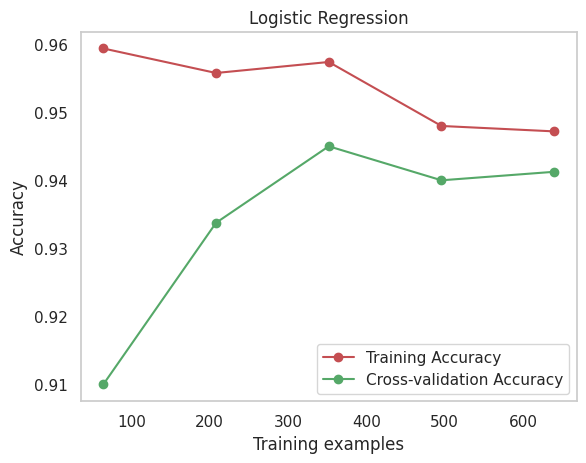

In [ ]:
plot_learning_curve(modelLR2, "Logistic Regression", X_train_scaled, y_train)

In [ ]:
print("Accuracy for training DT2: ", modelDT2.score(X_train_scaled, y_train))
print("Accuracy for testing DT2: ", modelDT2.score(X_test_scaled, y_test))

Accuracy for training DT2:  0.8425
Accuracy for testing DT2:  0.805


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


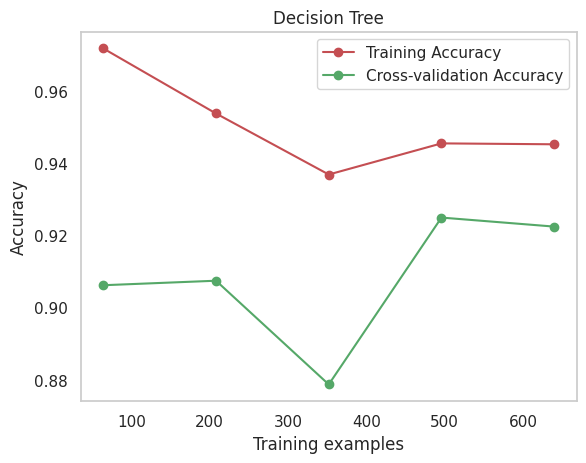

In [ ]:
plot_learning_curve(modelDT2, "Decision Tree", X_train_scaled, y_train)

In [ ]:
print("Accuracy for training RF2: ", modelRF2.score(X_train_scaled, y_train))
print("Accuracy for testing RF2: ", modelRF2.score(X_test_scaled, y_test))

Accuracy for training RF2:  0.95875
Accuracy for testing RF2:  0.965


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


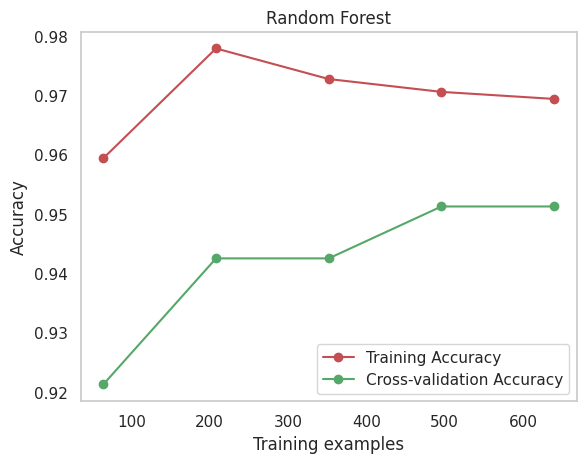

In [ ]:
plot_learning_curve(modelRF2, "Random Forest", X_train_scaled, y_train)